In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

In [2]:
data_folder = r'/content/drive/MyDrive/SVM Model Project/Dataset'
data_file = r'/content/drive/MyDrive/SVM Model Project/Dataset/metadata_breast_dataset.csv' 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
Data_Result = pd.read_csv('/content/drive/MyDrive/SVM Model Proejct /Dataset/metadata_breast_dataset.csv')
Data_Result

Unnamed: 0 SampleID    Label  Age Run_GW Run_TMD
0             0  LBMB011   cancer   63  R1101    R957
1             1  LBMB043   cancer   57  R1328   R1327
2             2  LBMB198   cancer   64  R1101    R957
3             3  LBMB200   cancer   62  R1101    R957
4             4  LBMB203   cancer   48  R1101    R957
..          ...      ...      ...  ...    ...     ...
132         235  LBGS099  control   30  R1475   R1475
133         242  LBGS106  control   55  R1475   R1475
134         245  LBGS109  control   62  R1475   R1475
135         246   CRCC12  control   27  R1490   R1481
136         249  LBGS111  control   59  R1475   R1475

[137 rows x 6 columns]

In [5]:
Data_GWFT_flen = pd.read_csv('/content/drive/MyDrive/SVM Model Proejct /Dataset/GWFP_flen_range_100_250.csv')
Data_GWFT_short = pd.read_csv('/content/drive/MyDrive/SVM Model Proejct /Dataset/GWFP_short.csv')
Data_GWMD = pd.read_csv('/content/drive/MyDrive/SVM Model Proejct /Dataset/GWMD_short.csv')
Data_TMD = pd.read_csv('/content/drive/MyDrive/SVM Model Proejct /Dataset/TMD_short.csv')
Data_Result = pd.read_csv('/content/drive/MyDrive/SVM Model Proejct /Dataset/metadata_breast_dataset.csv')

In [6]:
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
df1 = DataFrame(Data_GWFT_flen)


In [8]:
df2 = DataFrame(Data_GWFT_short)


In [9]:
df3 = DataFrame(Data_GWMD)


In [10]:
df4 = DataFrame(Data_TMD)


In [11]:
Data_Result

#Chuyển Label - số 1, 0
Data_Result["label_number"] =  Data_Result.Label.apply(lambda x: int(x=="cancer"))
Data_Result.head()


Unnamed: 0 SampleID   Label  Age Run_GW Run_TMD  label_number
0           0  LBMB011  cancer   63  R1101    R957             1
1           1  LBMB043  cancer   57  R1328   R1327             1
2           2  LBMB198  cancer   64  R1101    R957             1
3           3  LBMB200  cancer   62  R1101    R957             1
4           4  LBMB203  cancer   48  R1101    R957             1

In [12]:
Data_Result.info



<bound method DataFrame.info of      Unnamed: 0 SampleID    Label  Age Run_GW Run_TMD  label_number
0             0  LBMB011   cancer   63  R1101    R957             1
1             1  LBMB043   cancer   57  R1328   R1327             1
2             2  LBMB198   cancer   64  R1101    R957             1
3             3  LBMB200   cancer   62  R1101    R957             1
4             4  LBMB203   cancer   48  R1101    R957             1
..          ...      ...      ...  ...    ...     ...           ...
132         235  LBGS099  control   30  R1475   R1475             0
133         242  LBGS106  control   55  R1475   R1475             0
134         245  LBGS109  control   62  R1475   R1475             0
135         246   CRCC12  control   27  R1490   R1481             0
136         249  LBGS111  control   59  R1475   R1475             0

[137 rows x 7 columns]>

In [13]:
df = DataFrame(Data_Result)
df

Unnamed: 0 SampleID    Label  Age Run_GW Run_TMD  label_number
0             0  LBMB011   cancer   63  R1101    R957             1
1             1  LBMB043   cancer   57  R1328   R1327             1
2             2  LBMB198   cancer   64  R1101    R957             1
3             3  LBMB200   cancer   62  R1101    R957             1
4             4  LBMB203   cancer   48  R1101    R957             1
..          ...      ...      ...  ...    ...     ...           ...
132         235  LBGS099  control   30  R1475   R1475             0
133         242  LBGS106  control   55  R1475   R1475             0
134         245  LBGS109  control   62  R1475   R1475             0
135         246   CRCC12  control   27  R1490   R1481             0
136         249  LBGS111  control   59  R1475   R1475             0

[137 rows x 7 columns]

In [14]:
df = DataFrame(Data_Result)
#dfR2 = DataFrame(df1['LBMB011'])
#dfR2 = dfR2[0:137]
#df = pd.concat([dfR1, dfR2])
df



Unnamed: 0 SampleID    Label  Age Run_GW Run_TMD  label_number
0             0  LBMB011   cancer   63  R1101    R957             1
1             1  LBMB043   cancer   57  R1328   R1327             1
2             2  LBMB198   cancer   64  R1101    R957             1
3             3  LBMB200   cancer   62  R1101    R957             1
4             4  LBMB203   cancer   48  R1101    R957             1
..          ...      ...      ...  ...    ...     ...           ...
132         235  LBGS099  control   30  R1475   R1475             0
133         242  LBGS106  control   55  R1475   R1475             0
134         245  LBGS109  control   62  R1475   R1475             0
135         246   CRCC12  control   27  R1490   R1481             0
136         249  LBGS111  control   59  R1475   R1475             0

[137 rows x 7 columns]

In [15]:
Cancer = df[df.Label == 'cancer']
Cancer

Unnamed: 0 SampleID   Label  Age Run_GW Run_TMD  label_number
0            0  LBMB011  cancer   63  R1101    R957             1
1            1  LBMB043  cancer   57  R1328   R1327             1
2            2  LBMB198  cancer   64  R1101    R957             1
3            3  LBMB200  cancer   62  R1101    R957             1
4            4  LBMB203  cancer   48  R1101    R957             1
..         ...      ...     ...  ...    ...     ...           ...
70          76   MB037A  cancer   55  R1188   R1156             1
71          78   MB039A  cancer   53  R1188   R1156             1
72          79   MB042A  cancer   79  R1358   R1354             1
73          80   MB045A  cancer   79  R1358   R1354             1
74          82   MB053A  cancer   70  R1188   R1156             1

[75 rows x 7 columns]

In [16]:
Control = df[df.Label == 'control']
Control.head()

Unnamed: 0 SampleID    Label  Age Run_GW Run_TMD  label_number
75          32  LBHC018  control   62  R1010    R927             0
76          35   CRCC83  control   63  R1068    R943             0
77          37   CRCC86  control   43  R1068    R943             0
78          38   CRCC90  control   34  R1068    R943             0
79          43  LBHC029  control   51  R1116   R1074             0

In [17]:
#Thành lập bộ dữ liệu theo people - các đặc điểm - Label 

DATA PROCESS

In [18]:
Data_GWFT_flen 
Data_GWFT_short
Data_GWMD 
Data_TMD 
Data_Result

Unnamed: 0 SampleID    Label  Age Run_GW Run_TMD  label_number
0             0  LBMB011   cancer   63  R1101    R957             1
1             1  LBMB043   cancer   57  R1328   R1327             1
2             2  LBMB198   cancer   64  R1101    R957             1
3             3  LBMB200   cancer   62  R1101    R957             1
4             4  LBMB203   cancer   48  R1101    R957             1
..          ...      ...      ...  ...    ...     ...           ...
132         235  LBGS099  control   30  R1475   R1475             0
133         242  LBGS106  control   55  R1475   R1475             0
134         245  LBGS109  control   62  R1475   R1475             0
135         246   CRCC12  control   27  R1490   R1481             0
136         249  LBGS111  control   59  R1475   R1475             0

[137 rows x 7 columns]

In [19]:
pd.set_option('display.max_columns', None)

In [20]:
Data_GWFT_flen_cleaned = Data_GWFT_flen.T.drop("Unnamed: 0")
Data_GWFT_flen_cleaned.columns = ["GWFT_flen_" + str(i) for i in range(151)]
Data_GWFT_flen_cleaned

GWFT_flen_0  GWFT_flen_1  GWFT_flen_2  GWFT_flen_3  GWFT_flen_4  \
LBMB011     0.002710     0.002886     0.002950     0.003003     0.003073   
LBMB043     0.002775     0.002935     0.003001     0.003032     0.003025   
LBMB198     0.002662     0.002846     0.002976     0.003028     0.003078   
LBMB200     0.002393     0.002587     0.002630     0.002664     0.002724   
LBMB203     0.003081     0.003278     0.003464     0.003579     0.003681   
...              ...          ...          ...          ...          ...   
LBGS099     0.000600     0.000718     0.000800     0.000894     0.000969   
LBGS106     0.000609     0.000760     0.000883     0.000955     0.001017   
LBGS109     0.000679     0.000815     0.000957     0.001037     0.001079   
CRCC12      0.000611     0.000712     0.000809     0.000927     0.001013   
LBGS111     0.000753     0.000915     0.000983     0.001134     0.001194   

         GWFT_flen_5  GWFT_flen_6  GWFT_flen_7  GWFT_flen_8  GWFT_flen_9  \
LBMB011     0.003121     0.003270     0.003491     0.003869     0.004296   
LBMB043     0.003097     0.003197     0.003473     0.003816     0.004311   
LBMB198     0.003089     0.003210     0.003379     0.003699     0.004088   
LBMB200     0.002731     0.002830     0.002988     0.003278     0.003638   
LBMB203     0.003866     0.004053     0.004390     0.004823     0.005287   
...              ...          ...          ...          ...          ...   
LBGS099     0.001006     0.001039     0.001093     0.001084     0.001132   
LBGS106     0.001077     0.001102     0.001078     0.001119     0.001180   
LBGS109     0.001149     0.001170     0.001202     0.001189     0.001287   
CRCC12      0.001033     0.001075     0.001101     0.001137     0.001156   
LBGS111     0.001196     0.001241     0.001271     0.001322     0.001337   

         GWFT_flen_10  GWFT_flen_11  GWFT_flen_12  GWFT_flen_13  GWFT_flen_14  \
LBMB011      0.004885      0.005287      0.005799      0.006131      0.006472   
LBMB043      0.004884      0.005416      0.005855      0.006191      0.006465   
LBMB198      0.004580      0.005065      0.005529      0.005841      0.006070   
LBMB200      0.004051      0.004558      0.004927      0.005142      0.005429   
LBMB203      0.005826      0.006406      0.006922      0.007344      0.007789   
...               ...           ...           ...           ...           ...   
LBGS099      0.001269      0.001397      0.001549      0.001674      0.001760   
LBGS106      0.001323      0.001444      0.001576      0.001691      0.001747   
LBGS109      0.001378      0.001555      0.001677      0.001844      0.001962   
CRCC12       0.001262      0.001403      0.001433      0.001533      0.001630   
LBGS111      0.001469      0.001612      0.001776      0.001900      0.001961   

         GWFT_flen_15  GWFT_flen_16  GWFT_flen_17  GWFT_flen_18  GWFT_flen_19  \
LBMB011      0.006814      0.007248      0.007829      0.008474      0.009270   
LBMB043      0.006766      0.007210      0.007894      0.008699      0.009680   
LBMB198      0.006439      0.006799      0.007361      0.008079      0.008828   
LBMB200      0.005725      0.006020      0.006570      0.007283      0.007942   
LBMB203      0.008236      0.008799      0.009391      0.010161      0.011021   
...               ...           ...           ...           ...           ...   
LBGS099      0.001848      0.001795      0.001834      0.001867      0.001969   
LBGS106      0.001764      0.001784      0.001819      0.001852      0.001931   
LBGS109      0.001941      0.001970      0.001938      0.001974      0.002032   
CRCC12       0.001694      0.001770      0.001803      0.001819      0.001917   
LBGS111      0.001963      0.001991      0.002015      0.001999      0.002055   

         GWFT_flen_20  GWFT_flen_21  GWFT_flen_22  GWFT_flen_23  GWFT_flen_24  \
LBMB011      0.010062      0.010566      0.011125      0.011329      0.011848   
LBMB043      0.010519      0.011225      0.011668      0.011951      0.0121

In [21]:
Data_GWFT_short_cleaned = Data_GWFT_short.T.drop("bins")
Data_GWFT_short_cleaned.columns = ["GWFT_" + str(i) for i in range(len(Data_GWFT_short_cleaned.columns))]
Data_GWFT_short_cleaned

GWFT_0 GWFT_1 GWFT_2 GWFT_3 GWFT_4 GWFT_5 GWFT_6 GWFT_7 GWFT_8 GWFT_9  \
LBMB011   6406   5728   6272   5390   5250   5298   6068   5710   6672    648   
LBMB043  14820  12998  12936  11446  11678  10958  13592  13036  15166   1442   
LBMB198  15934  15112  15512  13724  14252  14128  15668  14842  16272   1386   
LBMB200   8800   8138   8046   6988   7406   6888   8072   8086   9407    761   
LBMB203  16490  15526  15982  14684  14444  13636  15684  15106  16662   1620   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
LBGS099   5396   4038   4348   3534   3544   3414   4354   4416   5554    552   
LBGS106   6240   4877   5034   4132   4402   4110   5064   5026   6078    696   
LBGS109   5254   4432   4564   3804   3774   3722   4390   4264   5476    514   
CRCC12    2876   2558   2648   2156   2304   2232   2730   2582   2906    310   
LBGS111   5926   4578   4794   3944   4014   3930   4772   4696   6136    674   

        GWFT_10 GWFT_11 GWFT_12 GWFT_13 GWFT_14 GWFT_15 GWFT_16 GWFT_17  \
LBMB011    5420    5516    5184    6022    4926    6032    4644    4992   
LBMB043   11422   11826   11014   12710   11188   11816   10178   10808   
LBMB198   13948   14252   13926   15222   13348   16472   11846   13048   
LBMB200    7018    7192    6903    7969    6778    7260    6272    6770   
LBMB203   14038   14538   14094   15458   13268   16472   12124   13404   
...         ...     ...     ...     ...     ...     ...     ...     ...   
LBGS099    3552    3514    3464    4328    3500    3668    3242    3382   
LBGS106    3986    4342    4004    4892    4176    4936    3868    3934   
LBGS109    3796    3910    3612    4426    3750    4230    3414    3692   
CRCC12     2084    2268    2110    2584    2124    2246    2076    2060   
LBGS111    4042    3950    3904    4676    3868    5554    3936    3816   

        GWFT_18 GWFT_19 GWFT_20 GWFT_21 GWFT_22 GWFT_23 GWFT_24 GWFT_25  \
LBMB011    5932    5198    6060    5060    5998    5160    5046    4740   
LBMB043   12942   10922   12946    9746   13078   11410   10892   10562   
LBMB198   15184   14170   14958   13208   14970   13962   12800   12130   
LBMB200    8268    7120    8044    6442    8044    7142    6800    6254   
LBMB203   15466   14284   14832   13522   15568   14212   13688   12290   
...         ...     ...     ...     ...     ...     ...     ...     ...   
LBGS099    4394    3228    3950    2846    4258    3380    3486    3356   
LBGS106    5094    4048    4786    3790    4830    4076    4058    3878   
LBGS109    4506    3666    4074    3198    4500    3628    3586    3352   
CRCC12     2600    2196    2466    1784    2586    2174    2046    2030   
LBGS111    4740    3864    4376    3270    4736    3908    4130    3824   

        GWFT_26 GWFT_27 GWFT_28 GWFT_29 GWFT_30 GWFT_31 GWFT_32 GWFT_33  \
LBMB011    5778    4612    6262    5194    5734    4850    5316    5910   
LBMB043   11950   10138   14802   10844   12414    9920   10892   13488   
LBMB198   14066   11712   15216   13822   14956   13112   13898   15292   
LBMB200    7232    6162    8804    6936    7810    6254    6862    8116   
LBMB203   14538   12222   14018   12511   14364   11966   12698   14250   
...         ...     ...     ...     ...     ...     ...     ...     ...   
LBGS099    3508    3166    5364    3174    3966    2650    3370    4320   
LBGS106    4562    3695    6090    4048    4698    3642    4012    4882   
LBGS109    3698    3180    5204    3516    4020    3456    3548    4544   
CRCC12     2216    1970    2968    2118    2530    1800    2072    2730   
LBGS111    4380    3478    6002    3830    4178    3342    3732    4966   

        GWFT_34 GWFT_35 GWFT_36 GWFT_37 GWFT_38 GWFT_39 GWFT_40 GWFT_41  \
LBMB011    5584    5612    6454    5834    5134    4788    5054    4962   
LBMB043   12532   12562   14846   13378   10994    9640   10916    9796   
LBMB198   14836   14712   15066   15342   14042   13074   13910   12896   
LBMB200    7598    7684    8934 

In [22]:
Data_GWMD_cleaned = Data_GWMD.T.drop("bins")
Data_GWMD_cleaned.columns = ["GWMD_" + str(i) for i in range(len(Data_GWMD_cleaned.columns))]
Data_GWMD_cleaned

GWMD_0     GWMD_1     GWMD_2     GWMD_3     GWMD_4     GWMD_5  \
LBMB011  70.027624  78.049776  80.016899  79.547553  78.238342  80.588235   
LBMB043  50.112765  69.216498  72.582973  77.221453  72.680851  81.253012   
LBMB198  73.939394  82.281603  81.508621   82.92249  79.962894  82.079758   
LBMB200  70.813397  80.762411  78.121878  78.511566  78.918169  85.475285   
LBMB203  69.754253  79.685967  77.625166  76.261773  69.148441  75.177978   
...            ...        ...        ...        ...        ...        ...   
LBGS099  46.485261  67.884794  70.902037       75.0   75.07109  82.762557   
LBGS106  48.774303  65.568936  69.599579  78.238719  73.245614  82.369942   
LBGS109  50.909091  65.732519  70.896947   72.23418  74.430129  82.582217   
CRCC12    58.59375  68.475312  69.054054   74.17703  68.273717  79.640719   
LBGS111   51.67576  66.658734  71.947757  73.348745  72.193878  83.115578   

            GWMD_6     GWMD_7     GWMD_8     GWMD_9    GWMD_10    GWMD_11  \
LBMB011  76.444444  85.414768  83.579154  80.378096  83.812654  81.916538   
LBMB043  64.261402  80.699856  78.214119  74.921719   77.22409  69.339005   
LBMB198  79.946365  83.656958  85.061224  81.006549  83.239635  78.755911   
LBMB200  74.536256  81.747573   82.75154  79.485936  79.526627  75.800712   
LBMB203  75.152572      82.48  85.673077  82.286432  84.855491  75.290023   
...            ...        ...        ...        ...        ...        ...   
LBGS099  63.358396   79.16318  71.848225  77.166437  78.449612  69.414484   
LBGS106  58.368281  81.654957  76.815642  72.256729  75.301205  65.690104   
LBGS109  59.499489  79.633205   72.09776  71.654581  76.034237  71.772253   
CRCC12   66.240409  76.070529  78.489327   77.71855   73.18236  70.491803   
LBGS111  57.634409  77.838954  72.679965  75.827815  75.590551  70.149254   

           GWMD_12    GWMD_13    GWMD_14    GWMD_15    GWMD_16    GWMD_17  \
LBMB011   82.00692  79.617834  85.064935  83.887043  79.475983  77.002967   
LBMB043  77.999134  79.010495  77.671233  74.887725  69.749304  66.184892   
LBMB198  86.889098  79.526462  81.186869  85.295268  77.719847  79.950231   
LBMB200  81.174805  85.196375    82.9559  84.351914  72.846348  77.311828   
LBMB203  83.716565  79.037267  81.859558  83.286685  77.378641  76.688218   
...            ...        ...        ...        ...        ...        ...   
LBGS099  79.344262  72.025723  76.146789  73.350254  70.875084  65.525825   
LBGS106  82.085561  66.569767  73.235686  77.689594  70.787172  58.415842   
LBGS109    76.5625  82.170543   67.60355  73.090909  68.237705  65.081522   
CRCC12    70.37037  83.561644  68.298969  76.660988  75.028121  67.677946   
LBGS111  77.904564  66.402116  77.835951  79.474069  67.313177  68.357349   

           GWMD_18    GWMD_19    GWMD_20    GWMD_21    GWMD_22    GWMD_23  \
LBMB011  66.984127  72.373188   80.92613  78.592375  81.078611  77.988827   
LBMB043  64.214351  67.204104  70.242215  69.267707  80.097425  73.454869   
LBMB198  70.437134   80.83682  79.201995   83.96726  81.939672  81.818182   
LBMB200   69.88389  75.894539  76.719577  78.267254  81.941176  76.507439   
LBMB203  74.765432  78.931624  78.863746  78.486647  82.317532  79.040767   
...            ...        ...        ...        ...        ...        ...   
LBGS099  69.560557  71.861837  66.974596  67.375133   71.99341  74.267782   
LBGS106  64.421252  66.029074  70.077973  66.617211  71.214188  71.103623   
LBGS109  65.283843  62.859425   66.57197  76.481836  72.875536  64.901961   
CRCC12   63.032368  67.082683  69.776876  75.425039  75.322812  67.697063   
LBGS111  63.946281  67.626404  66.454545  68.357143   77.36411  69.308469   

           GWMD_24    GWMD_25    GWMD_26    GWMD_27    GWMD_28    GWMD_29  \
LBMB011  79.306931  74.712644   73.87218  80.171674  84.331797  79.631761   
LBMB043  75.880052  68.922707  69.921597  69.665272  75.603095  67.846461   
LBMB198  80.720146  80.639185  78.627281  81.874722  86.542718  82.135076   
LBMB

In [23]:
Data_TMD_cleaned = Data_TMD.T.drop("region")
Data_TMD_cleaned.columns = ["TMD_" + str(i) for i in range(len(Data_TMD_cleaned.columns))]
Data_TMD_cleaned

TMD_0      TMD_1      TMD_2      TMD_3       TMD_4       TMD_5  \
LBMB011   98.206278  10.588235  14.184397  32.380952  100.000000   96.610169   
LBMB043   95.945946   5.928854   5.555556   6.978233   94.852941   91.666667   
LBMB198   99.047619  25.000000   5.240175   0.000000   98.571429   94.339623   
LBMB200  100.000000  24.752475   4.615385  13.008130   93.750000   89.285714   
LBMB203   61.904762  14.545455  22.178988  22.641509   93.814433   91.666667   
...             ...        ...        ...        ...         ...         ...   
LBGS099   90.350877   1.851852   7.558140   2.811245   97.354497  100.000000   
LBGS106   95.567867   6.950355   2.206897   6.090072   96.271186   91.818182   
LBGS109   95.121951   5.583756  21.711900   9.684685   96.226415  100.000000   
CRCC12    97.674419   6.321839   5.472637   5.234460   84.018265   97.619048   
LBGS111  100.000000   4.651163  24.886878   9.273570   98.214286   88.043478   

              TMD_6      TMD_7      TMD_8     TMD_9     TMD_10    TMD_11  \
LBMB011  100.000000  15.625000  20.192308  0.000000  86.075949  0.000000   
LBMB043  100.000000  34.959350  29.545455  0.105932  94.514768  4.054054   
LBMB198  100.000000   6.060606  16.494845  2.564103  87.401575  0.000000   
LBMB200  100.000000  24.840764   8.080808  0.000000  84.756098  4.166667   
LBMB203  100.000000  32.142857  49.222798  0.898204  74.754098  7.142857   
...             ...        ...        ...       ...        ...       ...   
LBGS099  100.000000  21.739130  22.033898  1.675978  89.928058  0.000000   
LBGS106   97.435897  32.894737  15.920398  0.289855  86.987952  2.531646   
LBGS109   92.592593  12.328767  25.217391  0.579151  84.821429  8.163265   
CRCC12    90.476190   9.289617  26.415094  2.448211  89.915966  5.333333   
LBGS111  100.000000   5.309735  19.354839  0.840336  81.250000  2.702703   

           TMD_12     TMD_13     TMD_14     TMD_15     TMD_16     TMD_17  \
LBMB011  0.000000   8.196721   4.494382   7.317073   9.677419  85.401460   
LBMB043  3.305785   1.515152   3.474178   3.351955   3.821656  80.542986   
LBMB198  0.000000  11.194030  12.068966   0.000000   1.538462  95.104895   
LBMB200  0.000000   0.000000   7.750473   4.040404   1.344086  90.404040   
LBMB203  0.000000  26.219512  16.617211   5.063291  50.693374  85.507246   
...           ...        ...        ...        ...        ...        ...   
LBGS099  0.000000   7.333333   3.488372   4.938272   3.088803  86.774194   
LBGS106  0.571429   7.407407   2.658789   7.582938   2.050114  80.126183   
LBGS109  0.000000   3.278689   2.861562   8.000000   4.404145  76.020408   
CRCC12   0.675676   7.650273   4.574333   3.225806   4.527559  84.883721   
LBGS111  6.250000   1.273885   4.040404  12.765957   1.428571  84.018265   

            TMD_18     TMD_19     TMD_20     TMD_21     TMD_22     TMD_23  \
LBMB011   0.000000   0.000000   0.000000   1.612903   9.375000   8.333333   
LBMB043   2.409639  15.000000  10.714286   2.341920   6.779661   2.824859   
LBMB198  13.636364  56.250000  66.666667  14.646465   2.898551  11.428571   
LBMB200  23.611111   0.000000  21.052632   3.651685   0.000000   2.702703   
LBMB203  30.263158   0.000000  16.666667  30.339806  35.616438  24.503311   
...            ...        ...        ...        ...        ...        ...   
LBGS099   1.003344  15.384615   8.000000   1.081081  54.054054   4.329004   
LBGS106   3.877221   0.000000   0.000000   9.302326   3.092784   2.197802   
LBGS109  16.417910  10.344828   0.000000   6.129032   1.388889   4.276316   
CRCC12   15.555556   4.166667  12.500000   7.027027   0.000000   6.719368   
LBGS111   5.454545   0.000000   0.000000   5.844156   1.234568   1.754386   

            TMD_24     TMD_25     TMD_26     TMD_27     TMD_28  TMD_29  \
LBMB011   7.692308   0.000000   0.000000   0.000000  34.722222    0.00   
LBMB043   5.797101   9.090909   2.345416   2.873563   1.162791    0.00   
LBMB198  33.333333  13.265306   6.666667   1.162791   0.000000    0.00   
LBMB20

In [24]:
Data_Result["label_number"] =  Data_Result.Label.apply(lambda x: int(x=="cancer"))
Data_Result_cleaned = Data_Result.set_index("SampleID").drop("Unnamed: 0", axis=1)
Data_Result_cleaned = Data_Result_cleaned.rename_axis(index=None)
Data_Result_cleaned

Label  Age Run_GW Run_TMD  label_number
LBMB011   cancer   63  R1101    R957             1
LBMB043   cancer   57  R1328   R1327             1
LBMB198   cancer   64  R1101    R957             1
LBMB200   cancer   62  R1101    R957             1
LBMB203   cancer   48  R1101    R957             1
...          ...  ...    ...     ...           ...
LBGS099  control   30  R1475   R1475             0
LBGS106  control   55  R1475   R1475             0
LBGS109  control   62  R1475   R1475             0
CRCC12   control   27  R1490   R1481             0
LBGS111  control   59  R1475   R1475             0

[137 rows x 5 columns]

In [25]:
list_df = [
           Data_GWFT_flen_cleaned,
           Data_GWFT_short_cleaned,
           Data_GWMD_cleaned,
           Data_TMD_cleaned,
           Data_Result_cleaned
]

In [26]:
df_data_full = None
for df in list_df:
    if df_data_full is not None:
        df_data_full = df_data_full.join(df)
    else:
        df_data_full = df
    

In [27]:
df_data_full

GWFT_flen_0  GWFT_flen_1  GWFT_flen_2  GWFT_flen_3  GWFT_flen_4  \
LBMB011     0.002710     0.002886     0.002950     0.003003     0.003073   
LBMB043     0.002775     0.002935     0.003001     0.003032     0.003025   
LBMB198     0.002662     0.002846     0.002976     0.003028     0.003078   
LBMB200     0.002393     0.002587     0.002630     0.002664     0.002724   
LBMB203     0.003081     0.003278     0.003464     0.003579     0.003681   
...              ...          ...          ...          ...          ...   
LBGS099     0.000600     0.000718     0.000800     0.000894     0.000969   
LBGS106     0.000609     0.000760     0.000883     0.000955     0.001017   
LBGS109     0.000679     0.000815     0.000957     0.001037     0.001079   
CRCC12      0.000611     0.000712     0.000809     0.000927     0.001013   
LBGS111     0.000753     0.000915     0.000983     0.001134     0.001194   

         GWFT_flen_5  GWFT_flen_6  GWFT_flen_7  GWFT_flen_8  GWFT_flen_9  \
LBMB011     0.003121     0.003270     0.003491     0.003869     0.004296   
LBMB043     0.003097     0.003197     0.003473     0.003816     0.004311   
LBMB198     0.003089     0.003210     0.003379     0.003699     0.004088   
LBMB200     0.002731     0.002830     0.002988     0.003278     0.003638   
LBMB203     0.003866     0.004053     0.004390     0.004823     0.005287   
...              ...          ...          ...          ...          ...   
LBGS099     0.001006     0.001039     0.001093     0.001084     0.001132   
LBGS106     0.001077     0.001102     0.001078     0.001119     0.001180   
LBGS109     0.001149     0.001170     0.001202     0.001189     0.001287   
CRCC12      0.001033     0.001075     0.001101     0.001137     0.001156   
LBGS111     0.001196     0.001241     0.001271     0.001322     0.001337   

         GWFT_flen_10  GWFT_flen_11  GWFT_flen_12  GWFT_flen_13  GWFT_flen_14  \
LBMB011      0.004885      0.005287      0.005799      0.006131      0.006472   
LBMB043      0.004884      0.005416      0.005855      0.006191      0.006465   
LBMB198      0.004580      0.005065      0.005529      0.005841      0.006070   
LBMB200      0.004051      0.004558      0.004927      0.005142      0.005429   
LBMB203      0.005826      0.006406      0.006922      0.007344      0.007789   
...               ...           ...           ...           ...           ...   
LBGS099      0.001269      0.001397      0.001549      0.001674      0.001760   
LBGS106      0.001323      0.001444      0.001576      0.001691      0.001747   
LBGS109      0.001378      0.001555      0.001677      0.001844      0.001962   
CRCC12       0.001262      0.001403      0.001433      0.001533      0.001630   
LBGS111      0.001469      0.001612      0.001776      0.001900      0.001961   

         GWFT_flen_15  GWFT_flen_16  GWFT_flen_17  GWFT_flen_18  GWFT_flen_19  \
LBMB011      0.006814      0.007248      0.007829      0.008474      0.009270   
LBMB043      0.006766      0.007210      0.007894      0.008699      0.009680   
LBMB198      0.006439      0.006799      0.007361      0.008079      0.008828   
LBMB200      0.005725      0.006020      0.006570      0.007283      0.007942   
LBMB203      0.008236      0.008799      0.009391      0.010161      0.011021   
...               ...           ...           ...           ...           ...   
LBGS099      0.001848      0.001795      0.001834      0.001867      0.001969   
LBGS106      0.001764      0.001784      0.001819      0.001852      0.001931   
LBGS109      0.001941      0.001970      0.001938      0.001974      0.002032   
CRCC12       0.001694      0.001770      0.001803      0.001819      0.001917   
LBGS111      0.001963      0.001991      0.002015      0.001999      0.002055   

         GWFT_flen_20  GWFT_flen_21  GWFT_flen_22  GWFT_flen_23  GWFT_flen_24  \
LBMB011      0.010062      0.010566      0.011125      0.011329      0.011848   
LBMB043      0.010519      0.011225      0.011668      0.011951      0.0121

In [28]:
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/MyDrive/SVM Model Proejct /Dataset/Datafull.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_data_full.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/MyDrive/SVM Model Proejct /Dataset/Data_GWFT_flen_cleaned.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  Data_GWFT_flen_cleaned.to_csv(f)
Data_GWFT_flen_cleaned 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


GWFT_flen_0  GWFT_flen_1  GWFT_flen_2  GWFT_flen_3  GWFT_flen_4  \
LBMB011     0.002710     0.002886     0.002950     0.003003     0.003073   
LBMB043     0.002775     0.002935     0.003001     0.003032     0.003025   
LBMB198     0.002662     0.002846     0.002976     0.003028     0.003078   
LBMB200     0.002393     0.002587     0.002630     0.002664     0.002724   
LBMB203     0.003081     0.003278     0.003464     0.003579     0.003681   
...              ...          ...          ...          ...          ...   
LBGS099     0.000600     0.000718     0.000800     0.000894     0.000969   
LBGS106     0.000609     0.000760     0.000883     0.000955     0.001017   
LBGS109     0.000679     0.000815     0.000957     0.001037     0.001079   
CRCC12      0.000611     0.000712     0.000809     0.000927     0.001013   
LBGS111     0.000753     0.000915     0.000983     0.001134     0.001194   

         GWFT_flen_5  GWFT_flen_6  GWFT_flen_7  GWFT_flen_8  GWFT_flen_9  \
LBMB011     0.003121     0.003270     0.003491     0.003869     0.004296   
LBMB043     0.003097     0.003197     0.003473     0.003816     0.004311   
LBMB198     0.003089     0.003210     0.003379     0.003699     0.004088   
LBMB200     0.002731     0.002830     0.002988     0.003278     0.003638   
LBMB203     0.003866     0.004053     0.004390     0.004823     0.005287   
...              ...          ...          ...          ...          ...   
LBGS099     0.001006     0.001039     0.001093     0.001084     0.001132   
LBGS106     0.001077     0.001102     0.001078     0.001119     0.001180   
LBGS109     0.001149     0.001170     0.001202     0.001189     0.001287   
CRCC12      0.001033     0.001075     0.001101     0.001137     0.001156   
LBGS111     0.001196     0.001241     0.001271     0.001322     0.001337   

         GWFT_flen_10  GWFT_flen_11  GWFT_flen_12  GWFT_flen_13  GWFT_flen_14  \
LBMB011      0.004885      0.005287      0.005799      0.006131      0.006472   
LBMB043      0.004884      0.005416      0.005855      0.006191      0.006465   
LBMB198      0.004580      0.005065      0.005529      0.005841      0.006070   
LBMB200      0.004051      0.004558      0.004927      0.005142      0.005429   
LBMB203      0.005826      0.006406      0.006922      0.007344      0.007789   
...               ...           ...           ...           ...           ...   
LBGS099      0.001269      0.001397      0.001549      0.001674      0.001760   
LBGS106      0.001323      0.001444      0.001576      0.001691      0.001747   
LBGS109      0.001378      0.001555      0.001677      0.001844      0.001962   
CRCC12       0.001262      0.001403      0.001433      0.001533      0.001630   
LBGS111      0.001469      0.001612      0.001776      0.001900      0.001961   

         GWFT_flen_15  GWFT_flen_16  GWFT_flen_17  GWFT_flen_18  GWFT_flen_19  \
LBMB011      0.006814      0.007248      0.007829      0.008474      0.009270   
LBMB043      0.006766      0.007210      0.007894      0.008699      0.009680   
LBMB198      0.006439      0.006799      0.007361      0.008079      0.008828   
LBMB200      0.005725      0.006020      0.006570      0.007283      0.007942   
LBMB203      0.008236      0.008799      0.009391      0.010161      0.011021   
...               ...           ...           ...           ...           ...   
LBGS099      0.001848      0.001795      0.001834      0.001867      0.001969   
LBGS106      0.001764      0.001784      0.001819      0.001852      0.001931   
LBGS109      0.001941      0.001970      0.001938      0.001974      0.002032   
CRCC12       0.001694      0.001770      0.001803      0.001819      0.001917   
LBGS111      0.001963      0.001991      0.002015      0.001999      0.002055   

         GWFT_flen_20  GWFT_flen_21  GWFT_flen_22  GWFT_flen_23  GWFT_flen_24  \
LBMB011      0.010062      0.010566      0.011125      0.011329      0.011848   
LBMB043      0.010519      0.011225      0.011668      0.011951      0.0121

In [30]:
df_data_full.describe()

GWFT_flen_0  GWFT_flen_1  GWFT_flen_2  GWFT_flen_3  GWFT_flen_4  \
count   137.000000   137.000000   137.000000   137.000000   137.000000   
mean      0.002642     0.002818     0.002904     0.002945     0.002972   
std       0.001115     0.001165     0.001193     0.001190     0.001179   
min       0.000422     0.000525     0.000574     0.000648     0.000688   
25%       0.002192     0.002251     0.002406     0.002465     0.002536   
50%       0.002905     0.003100     0.003186     0.003248     0.003261   
75%       0.003377     0.003630     0.003684     0.003720     0.003753   
max       0.004958     0.005215     0.005363     0.005398     0.005324   

       GWFT_flen_5  GWFT_flen_6  GWFT_flen_7  GWFT_flen_8  GWFT_flen_9  \
count   137.000000   137.000000   137.000000   137.000000   137.000000   
mean      0.003025     0.003146     0.003344     0.003641     0.004041   
std       0.001187     0.001221     0.001298     0.001418     0.001580   
min       0.000723     0.000763     0.000788     0.000816     0.000812   
25%       0.002611     0.002682     0.002873     0.003184     0.003556   
50%       0.003303     0.003432     0.003633     0.004004     0.004471   
75%       0.003754     0.003962     0.004172     0.004567     0.005098   
max       0.005285     0.005400     0.005604     0.006030     0.006804   

       GWFT_flen_10  GWFT_flen_11  GWFT_flen_12  GWFT_flen_13  GWFT_flen_14  \
count    137.000000    137.000000    137.000000    137.000000    137.000000   
mean       0.004492      0.004951      0.005307      0.005613      0.005846   
std        0.001766      0.001946      0.002133      0.002235      0.002350   
min        0.000919      0.001001      0.001118      0.001233      0.001297   
25%        0.003991      0.004482      0.004893      0.005105      0.005318   
50%        0.004963      0.005539      0.006013      0.006313      0.006567   
75%        0.005685      0.006252      0.006706      0.007043      0.007371   
max        0.007615      0.008534      0.009079      0.009786      0.010379   

       GWFT_flen_15  GWFT_flen_16  GWFT_flen_17  GWFT_flen_18  GWFT_flen_19  \
count    137.000000    137.000000    137.000000    137.000000    137.000000   
mean       0.006127      0.006483      0.006968      0.007601      0.008293   
std        0.002444      0.002581      0.002778      0.003031      0.003323   
min        0.001300      0.001330      0.001360      0.001363      0.001459   
25%        0.005558      0.005842      0.006437      0.007120      0.007775   
50%        0.006854      0.007262      0.007841      0.008699      0.009496   
75%        0.007695      0.008136      0.008745      0.009588      0.010579   
max        0.010892      0.011508      0.012283      0.013245      0.014190   

       GWFT_flen_20  GWFT_flen_21  GWFT_flen_22  GWFT_flen_23  GWFT_flen_24  \
count    137.000000    137.000000    137.000000    137.000000    137.000000   
mean       0.008975      0.009523      0.010078      0.010542      0.010970   
std        0.003605      0.003803      0.003732      0.003600      0.003495   
min        0.001521      0.001703      0.001945      0.002126      0.002323   
25%        0.008528      0.009122      0.009538      0.009875      0.010438   
50%        0.010267      0.010928      0.011438      0.011762      0.012041   
75%        0.011401      0.012086      0.012561      0.012839      0.013045   
max        0.015444      0.016171      0.016646      0.017262      0.017549   

       GWFT_flen_25  GWFT_flen_26  GWFT_flen_27  GWFT_flen_28  GWFT_flen_29  \
count    137.000000    137.000000    137.000000    137.000000    137.000000   
mean       0.011364      0.011752      0.012180      0.012674      0.013267   
std        0.003472      0.003542      0.003674      0.003855      0.004067   
min        0.002436      0.002548      0.002587      0.002542      0.002551   
25%        0.011066      0.011785      0.012512      0.013000      0.013621   
50%        0.012344      0.012757      0.013245      0.013857  

In [31]:
df_data_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, LBMB011 to LBGS111
Columns: 3928 entries, GWFT_flen_0 to label_number
dtypes: float64(601), int64(2), object(3325)
memory usage: 4.1+ MB


PCA DATA GWFT_flen

In [32]:
X_GWFTflen = df1_cleaned = Data_GWFT_flen_cleaned
y = df_data_full['label_number']
X_GWFTflen

GWFT_flen_0  GWFT_flen_1  GWFT_flen_2  GWFT_flen_3  GWFT_flen_4  \
LBMB011     0.002710     0.002886     0.002950     0.003003     0.003073   
LBMB043     0.002775     0.002935     0.003001     0.003032     0.003025   
LBMB198     0.002662     0.002846     0.002976     0.003028     0.003078   
LBMB200     0.002393     0.002587     0.002630     0.002664     0.002724   
LBMB203     0.003081     0.003278     0.003464     0.003579     0.003681   
...              ...          ...          ...          ...          ...   
LBGS099     0.000600     0.000718     0.000800     0.000894     0.000969   
LBGS106     0.000609     0.000760     0.000883     0.000955     0.001017   
LBGS109     0.000679     0.000815     0.000957     0.001037     0.001079   
CRCC12      0.000611     0.000712     0.000809     0.000927     0.001013   
LBGS111     0.000753     0.000915     0.000983     0.001134     0.001194   

         GWFT_flen_5  GWFT_flen_6  GWFT_flen_7  GWFT_flen_8  GWFT_flen_9  \
LBMB011     0.003121     0.003270     0.003491     0.003869     0.004296   
LBMB043     0.003097     0.003197     0.003473     0.003816     0.004311   
LBMB198     0.003089     0.003210     0.003379     0.003699     0.004088   
LBMB200     0.002731     0.002830     0.002988     0.003278     0.003638   
LBMB203     0.003866     0.004053     0.004390     0.004823     0.005287   
...              ...          ...          ...          ...          ...   
LBGS099     0.001006     0.001039     0.001093     0.001084     0.001132   
LBGS106     0.001077     0.001102     0.001078     0.001119     0.001180   
LBGS109     0.001149     0.001170     0.001202     0.001189     0.001287   
CRCC12      0.001033     0.001075     0.001101     0.001137     0.001156   
LBGS111     0.001196     0.001241     0.001271     0.001322     0.001337   

         GWFT_flen_10  GWFT_flen_11  GWFT_flen_12  GWFT_flen_13  GWFT_flen_14  \
LBMB011      0.004885      0.005287      0.005799      0.006131      0.006472   
LBMB043      0.004884      0.005416      0.005855      0.006191      0.006465   
LBMB198      0.004580      0.005065      0.005529      0.005841      0.006070   
LBMB200      0.004051      0.004558      0.004927      0.005142      0.005429   
LBMB203      0.005826      0.006406      0.006922      0.007344      0.007789   
...               ...           ...           ...           ...           ...   
LBGS099      0.001269      0.001397      0.001549      0.001674      0.001760   
LBGS106      0.001323      0.001444      0.001576      0.001691      0.001747   
LBGS109      0.001378      0.001555      0.001677      0.001844      0.001962   
CRCC12       0.001262      0.001403      0.001433      0.001533      0.001630   
LBGS111      0.001469      0.001612      0.001776      0.001900      0.001961   

         GWFT_flen_15  GWFT_flen_16  GWFT_flen_17  GWFT_flen_18  GWFT_flen_19  \
LBMB011      0.006814      0.007248      0.007829      0.008474      0.009270   
LBMB043      0.006766      0.007210      0.007894      0.008699      0.009680   
LBMB198      0.006439      0.006799      0.007361      0.008079      0.008828   
LBMB200      0.005725      0.006020      0.006570      0.007283      0.007942   
LBMB203      0.008236      0.008799      0.009391      0.010161      0.011021   
...               ...           ...           ...           ...           ...   
LBGS099      0.001848      0.001795      0.001834      0.001867      0.001969   
LBGS106      0.001764      0.001784      0.001819      0.001852      0.001931   
LBGS109      0.001941      0.001970      0.001938      0.001974      0.002032   
CRCC12       0.001694      0.001770      0.001803      0.001819      0.001917   
LBGS111      0.001963      0.001991      0.002015      0.001999      0.002055   

         GWFT_flen_20  GWFT_flen_21  GWFT_flen_22  GWFT_flen_23  GWFT_flen_24  \
LBMB011      0.010062      0.010566      0.011125      0.011329      0.011848   
LBMB043      0.010519      0.011225      0.011668      0.011951      0.0121

In [33]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler.fit(X_GWFTflen)
X_GWFTflen_scaler = scaler.transform(X_GWFTflen)


In [34]:
from sklearn.decomposition import PCA

pca_136 = PCA(n_components=136, random_state = 2020) #K<D nen can set n_compon = K = 136
pca_136.fit(X_GWFTflen_scaler)
X_pca_136 = pca_136.transform(X_GWFTflen_scaler)

print('Variance explained by all 30 principal component =',
      sum(pca_136.explained_variance_ratio_ *100))


Variance explained by all 30 principal component = 100.0


In [35]:
pca_136.explained_variance_ratio_ *100

array([8.15176501e+01, 1.15360388e+01, 4.28070921e+00, 1.79731385e+00,
       3.99466186e-01, 1.72347151e-01, 7.12427480e-02, 5.76792459e-02,
       3.96809932e-02, 3.01739999e-02, 1.19698329e-02, 9.65508299e-03,
       5.49231547e-03, 5.29807283e-03, 4.53234714e-03, 4.21633763e-03,
       3.61263003e-03, 3.34620109e-03, 3.00436765e-03, 2.90231071e-03,
       2.51776922e-03, 2.37075202e-03, 2.28364172e-03, 2.12887500e-03,
       1.96854199e-03, 1.88497457e-03, 1.77195520e-03, 1.69083067e-03,
       1.44219188e-03, 1.42023102e-03, 1.37846441e-03, 1.31619133e-03,
       1.18327327e-03, 1.17751735e-03, 1.06354139e-03, 9.70895263e-04,
       9.18263070e-04, 8.81876850e-04, 8.37568600e-04, 7.93496025e-04,
       7.57816093e-04, 7.09681600e-04, 6.83355931e-04, 6.65374443e-04,
       6.42166765e-04, 5.43525191e-04, 5.12084159e-04, 4.78420018e-04,
       4.46349218e-04, 4.27102606e-04, 4.04369381e-04, 3.84942989e-04,
       3.37915578e-04, 3.29873928e-04, 3.12481833e-04, 3.05356561e-04,
      

- TP dau tien ghi lai duoc 81% su thay doi trong tap data
- TP thu 2 ghi lai 11.5% 

In [36]:
np.cumsum(pca_136.explained_variance_ratio_ *100)

array([ 81.51765008,  93.05368884,  97.33439805,  99.13171189,
        99.53117808,  99.70352523,  99.77476798,  99.83244722,
        99.87212822,  99.90230222,  99.91427205,  99.92392713,
        99.92941945,  99.93471752,  99.93924987,  99.94346621,
        99.94707884,  99.95042504,  99.9534294 ,  99.95633172,
        99.95884948,  99.96122024,  99.96350388,  99.96563275,
        99.9676013 ,  99.96948627,  99.97125823,  99.97294906,
        99.97439125,  99.97581148,  99.97718994,  99.97850613,
        99.97968941,  99.98086692,  99.98193047,  99.98290136,
        99.98381962,  99.9847015 ,  99.98553907,  99.98633257,
        99.98709038,  99.98780006,  99.98848342,  99.98914879,
        99.98979096,  99.99033449,  99.99084657,  99.99132499,
        99.99177134,  99.99219844,  99.99260281,  99.99298775,
        99.99332567,  99.99365554,  99.99396803,  99.99427338,
        99.9945665 ,  99.99484893,  99.99512636,  99.99539116,
        99.99562106,  99.99585021,  99.99607179,  99.99

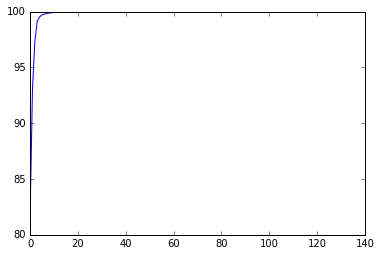

In [37]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca_136.explained_variance_ratio_ *100))



In [38]:
pca_2 = PCA(n_components=2, random_state = 2020)
pca_2.fit(X_GWFTflen_scaler)
X_GWFTflen_pca_2 = pca_2.transform(X_GWFTflen_scaler)



In [39]:
pca_3 = PCA(n_components=3, random_state = 2020)
pca_3.fit(X_GWFTflen_scaler)
X_GWFTflen_pca_3 = pca_3.transform(X_GWFTflen_scaler)

Giu lai 95% data

In [40]:
pca_95 = PCA(n_components=0.95, random_state = 2020)
pca_95.fit(X_GWFTflen_scaler)
X_GWFTflen_pca_95 = pca_95.transform(X_GWFTflen_scaler)
X_GWFTflen_pca_95.shape

(137, 3)

n_components=3 thi thong tin data duoc giu lai 95%

In [41]:
df_GWFT_flen_new = pd.DataFrame(X_GWFTflen_pca_95 ,columns = ['GWFT_flen_PCA1', 'GWFT_flen_PCA2', 'GWFT_flen_PCA3'])
#df_GWFT_flen_new['label'] = Data_Result_cleaned.label_number
df_GWFT_flen_new.head()

GWFT_flen_PCA1  GWFT_flen_PCA2  GWFT_flen_PCA3
0       -2.252113        0.899453        0.019169
1       -4.870362        0.872972       -0.408866
2       -3.479735        0.198917       -3.157495
3       -0.600841        2.045409       -3.191008
4       -6.930095       -1.376692        1.074311

In [42]:
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/MyDrive/SVM Model Proejct /Dataset/Data_GWFT_flen_PCA.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_GWFT_flen_new.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


USE GWMD data

In [43]:
X2 = Data_GWMD_cleaned
y = df_data_full['label_number']

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler.fit(X2)
X2_scaler = scaler.transform(X2)

from sklearn.decomposition import PCA

pca_30_2 = PCA(n_components=136, random_state = 2020) #K<D nen can set n_compon = K = 136
pca_30_2.fit(X2_scaler)
X_pca_30_2 = pca_30_2.transform(X2_scaler)

print('Variance explained by all 30 principal component =',
      sum(pca_30_2.explained_variance_ratio_ *100))

Variance explained by all 30 principal component = 99.99999999999999


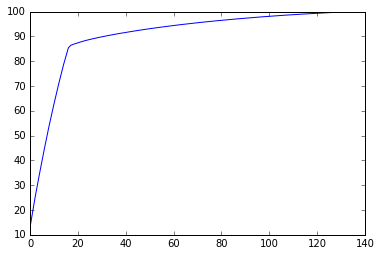

In [44]:
pca_30_2.explained_variance_ratio_ *100
np.cumsum(pca_30_2.explained_variance_ratio_ *100)
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca_30_2.explained_variance_ratio_ *100))

Lay n = 18 giu dc 87% thong tin du lieu

In [45]:
pca_95_2 = PCA(n_components=0.95, random_state = 2020)
pca_95_2.fit(X2_scaler)
X2_pca_95 = pca_95_2.transform(X2_scaler)
X2_pca_95.shape 

(137, 67)

In [46]:
df_GWMD_new = pd.DataFrame(X2_pca_95)
#df_GWFT_flen_new['label'] = Data_Result_cleaned.label_number
df_GWMD_new.columns = ["GWMD_PCA" + str(i) for i in range(len(df_GWMD_new.columns))]
df_GWMD_new.head()

GWMD_PCA0  GWMD_PCA1  GWMD_PCA2  GWMD_PCA3  GWMD_PCA4  GWMD_PCA5  \
0 -22.626602  -0.955284  -4.154077  -1.035126  -3.663447  -0.765360   
1  10.580418  -0.033179   0.933630  -0.083309   0.131926   0.465117   
2 -29.393621  -1.225883  -4.060452  -1.008121  -4.126151  -1.250710   
3 -18.907390  -0.974975  -3.723416  -0.743967  -3.601837  -1.513645   
4 -14.833990  -0.117016  -0.285712  -1.786169  -2.420782   0.610925   

   GWMD_PCA6  GWMD_PCA7  GWMD_PCA8  GWMD_PCA9  GWMD_PCA10  GWMD_PCA11  \
0   1.007548   1.764261  -5.207868  -3.133916   -2.065428   -1.829285   
1   0.401134   0.864734  -0.518868  -0.865881    0.145068   -1.377444   
2  -0.014787   2.195234  -5.883931  -2.190436   -3.176143   -1.230949   
3   0.312149   1.898506  -5.305318  -3.046461   -2.217474   -1.522950   
4  -0.181394   0.558973  -2.662045  -0.374725   -3.633067    1.171766   

   GWMD_PCA12  GWMD_PCA13  GWMD_PCA14  GWMD_PCA15  GWMD_PCA16  GWMD_PCA17  \
0   -1.771510   -3.180978    1.383036   -1.915998   -0.728069   -0.010449   
1   -1.080019   -0.528921   -0.356143    0.016330   -0.287447   -0.813436   
2   -1.851523   -3.725315    0.774849   -3.013920   -1.007187    1.420333   
3   -1.645286   -3.221203   -1.229788   -2.639709   -1.101807   -6.999575   
4   -2.502065   -2.130148    2.574401   -1.297647    0.383693   20.009361   

   GWMD_PCA18  GWMD_PCA19  GWMD_PCA20  GWMD_PCA21  GWMD_PCA22  GWMD_PCA23  \
0    0.197585   -0.126930   -0.106385    1.067180    0.214866   -1.224996   
1    0.114008   -1.065848    0.914100    0.458815    0.359004   -1.571282   
2   -0.767255   -0.026397   -0.006881    1.043627    0.759137   -0.731353   
3    0.541976   -1.057333    0.534336    1.069255   -0.248873    0.278113   
4    1.329296    1.371721    2.021700    0.349278    5.411360   -2.179531   

   GWMD_PCA24  GWMD_PCA25  GWMD_PCA26  GWMD_PCA27  GWMD_PCA28  GWMD_PCA29  \
0    2.101067   -1.151895    0.205442    0.684547    0.401771   -1.550018   
1    0.629629    0.941901    1.788423    0.846564    0.178401   -0.768133   
2    0.554779    0.076220   -0.059129    0.022987    0.173104    0.761751   
3    0.760345   -0.157544    1.191368   -0.158134    0.296662   -0.370997   
4   11.236562    0.468931   -9.562615   10.168337   -2.857109   -8.345664   

   GWMD_PCA30  GWMD_PCA31  GWMD_PCA32  GWMD_PCA33  GWMD_PCA34  GWMD_PCA35  \
0    0.700996   -0.793600   -0.602195   -0.503728    1.309683   -0.523834   
1   -1.035514   -0.868651    0.793337   -1.032442    0.992139    0.349118   
2   -0.496475   -0.110547   -0.415454    0.489702    0.800903    0.693803   
3   -0.780734   -0.084618   -0.760226    0.837436   -0.378632    2.008032   
4   -1.079774    1.965419    9.410042   -2.238369   -5.207308   -0.165770   

   GWMD_PCA36  GWMD_PCA37  GWMD_PCA38  GWMD_PCA39  GWMD_PCA40  GWMD_PCA41  \
0    0.184013   -0.736197    0.362864   -1.435526    2.838582    2.808830   
1   -0.231121    0.175735   -0.530062   -1.544451    0.348307   -0.326653   
2    0.083158    0.356851    0.438884   -0.348273   -0.443767   -0.023975   
3   -0.671527    0.454428    1.007622    1.597550    0.196563   -1.364784   
4    0.652806   -0.844165   -2.049475    3.092821   -0.641255   -4.407110   

   GWMD_PCA42  GWMD_PCA43  GWMD_PCA44  GWMD_PCA45  GWMD_PCA46  GWMD_PCA47  \
0    1.135429   -0.882839   -0.775691   -0.255922    0.279898   -2.850115   
1   -1.308638   -1.161897    0.061666    0.494845    0.864241   -0.591693   
2    1.444117    1.256638    0.668861   -0.285094   -0.412439   -1.317013   
3    1.194586    0.303219    1.683377   -2.954199   -0.654698    0.337997   
4   -3.798332   -0.667397    1.959759   -1.497866    0.725310    0.397183   

   GWMD_PCA48  GWMD_PCA49  GWMD_PCA50  GWMD_PCA51  GWMD_PCA52  GWMD_PCA53  \
0   -0.609885   -0.895653   -1.343744    0.085185    1.323099   -2.265740   
1    0.065255    0.583930   -1.095782    0.148560    2.292186    0.162249   
2   -0.570192   -0.412569   -0.412686   -0.969780    0.081790    0.552077   
3    0.034593   -1.228610   -1.754590   -3.404475  

In [47]:
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/MyDrive/SVM Model Proejct /Dataset/Data_GMD_PCA.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_GWMD_new.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


TMD DATA

In [48]:
X3 = Data_TMD_cleaned
y3 = df_data_full['label_number']

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler.fit(X3)
X3_scaler = scaler.transform(X3)

from sklearn.decomposition import PCA

pca_30_TMD= PCA(n_components=136, random_state = 2020) #K<D nen can set n_compon = K = 136
pca_30_TMD.fit(X3_scaler)
X_pca_30_TMD = pca_30_TMD.transform(X3_scaler)

print('Variance explained by all 30 principal component =',
      sum(pca_30_TMD.explained_variance_ratio_ *100))

Variance explained by all 30 principal component = 100.0


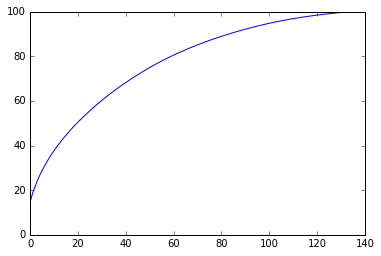

In [49]:
pca_30_TMD.explained_variance_ratio_ *100
np.cumsum(pca_30_TMD.explained_variance_ratio_ *100)
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca_30_TMD.explained_variance_ratio_ *100))

In [50]:
pca_95_TMD = PCA(n_components=0.95, random_state = 2020)
pca_95_TMD.fit(X3_scaler)
X3_pca_95 = pca_95_TMD.transform(X3_scaler)
X3_pca_95.shape 

(137, 102)

In [51]:
df_TMD_new = pd.DataFrame(X3_pca_95)
#df_GWFT_flen_new['label'] = Data_Result_cleaned.label_number
df_TMD_new.columns = ["TMD_PCA" + str(i) for i in range(len(df_TMD_new.columns))]
df_TMD_new.head()

TMD_PCA0   TMD_PCA1  TMD_PCA2  TMD_PCA3  TMD_PCA4  TMD_PCA5  TMD_PCA6  \
0   0.500055   0.578793  0.670095  0.079103 -0.729753 -1.260366  1.365713   
1  -1.017164   2.218169 -0.096823 -1.227769 -1.059675  0.050375 -1.463522   
2   1.461934   1.333645  1.350756  2.144520 -0.187270 -1.294058 -1.654395   
3  -3.109777  -2.652491  0.796182 -0.430721  0.731266 -2.383724  0.075564   
4  83.500931 -16.290236  2.705674  0.241084  0.572855  0.685382 -5.481092   

   TMD_PCA7  TMD_PCA8  TMD_PCA9  TMD_PCA10  TMD_PCA11  TMD_PCA12  TMD_PCA13  \
0  3.912914  0.707093  2.086259  -2.864778  -0.213750   4.978415   0.157009   
1 -0.372990 -0.009140 -1.127614  -0.188454   1.001754  -0.137553   0.168539   
2  0.240091 -0.979268  1.193435   6.208715  -1.074610   1.675268  -1.615505   
3 -0.423356 -1.601745 -1.294772   0.529747  -0.388646  -0.226664   1.075199   
4  1.252931  0.679795 -2.802941  -0.262061   3.173141   0.233980  -1.496633   

   TMD_PCA14  TMD_PCA15  TMD_PCA16  TMD_PCA17  TMD_PCA18  TMD_PCA19  \
0   5.724686   6.499510  -5.778819   1.704905   3.732161  -4.224887   
1   0.058683   0.632398  -1.082195  -0.466829  -0.995560   0.363640   
2  -2.725725  -0.725630  11.775209   6.545965   1.097098   1.902050   
3  -0.266806   1.853421   1.241288  -3.371825  -2.423495  -0.541192   
4   2.160578   0.695653  -0.101763  -1.807126  -0.207341   1.441207   

   TMD_PCA20  TMD_PCA21  TMD_PCA22  TMD_PCA23  TMD_PCA24  TMD_PCA25  \
0  -0.926678   2.989483   4.052332   0.492603   8.985627   6.058459   
1   0.777608  -1.312973  -1.134189   0.214851   0.820818  -0.412913   
2  -3.503055  -6.715823   2.461443  -2.300202  -1.101689  -2.514368   
3   0.121905  -2.126760   0.257357  -1.920731  -1.631479   0.300318   
4  -1.337141  -0.161168  -0.584921   1.616286  -1.282761   1.088979   

   TMD_PCA26  TMD_PCA27  TMD_PCA28  TMD_PCA29  TMD_PCA30  TMD_PCA31  \
0  -2.587102  -0.063126   5.642275  -0.280184  -0.754003  -0.612327   
1   1.350652  -0.687015  -0.509531  -0.273609  -0.157654  -0.774662   
2  -5.858186   0.065749   0.188879  -6.413943  -1.809452   1.937473   
3  -1.347671  -0.910917   1.833632  -1.973715   0.471367  -0.846931   
4   0.089655  -1.049545   0.798312  -0.068018   0.560449  -0.210414   

   TMD_PCA32  TMD_PCA33  TMD_PCA34  TMD_PCA35  TMD_PCA36  TMD_PCA37  \
0   0.145106   0.372157  -1.988771  -1.321997   2.915424   3.223759   
1   0.930672  -0.392478   0.159422  -0.798985  -0.383426   1.212573   
2   0.863802   1.342173   1.869132   1.230758  -0.598380  -1.013835   
3  -0.151985  -2.398777  -0.161823  -1.432131  -1.228162  -0.551394   
4  -0.227951   0.240801  -0.323162   0.209154   0.071769  -1.514905   

   TMD_PCA38  TMD_PCA39  TMD_PCA40  TMD_PCA41  TMD_PCA42  TMD_PCA43  \
0   5.278911  -2.359416  -0.321734  -0.293534  -2.105750   3.058869   
1   0.125946   0.720619   1.272646  -1.756508  -0.835828   0.473126   
2   1.463457   0.258015   4.123864  -2.493886  -0.455750   1.703890   
3  -0.073975  -0.090612  -1.871488  -1.557957   0.366652  -3.288435   
4  -0.363183   1.090640  -0.080496  -0.068569  -0.271468   0.155275   

   TMD_PCA44  TMD_PCA45  TMD_PCA46  TMD_PCA47  TMD_PCA48  TMD_PCA49  \
0   1.384046   0.662245   0.342344  -0.207797   0.208612   1.197863   
1   0.393249  -0.424800  -0.330009  -1.136316  -1.010544  -0.489303   
2  -0.415491  -1.182298  -2.225113  -0.474283   1.863322   1.764977   
3   2.698651  -2.045158  -1.330659  -1.379995   0.152934   1.582484   
4  -0.235231  -0.285924   0.799077  -0.286024   0.315966  -0.581242   

   TMD_PCA50  TMD_PCA51  TMD_PCA52  TMD_PCA53  TMD_PCA54  TMD_PCA55  \
0  -0.115953   3.325096  -0.080494   2.388932  -0.319568  -1.983413   
1  -0.543308  -0.754462   0.246962  -1.548197  -1.518604   0.894130   
2   0.704032   4.799052   1.720073   3.152697  -1.017985   0.567438   
3  -2.423488  -0.507741   1.683632  -1.732879   1.612412   1.660112   
4  -0.043230   0.451223   0.179884   0.332091   0.020807   0.283516   

   TMD_PCA56  TMD_PCA57  TMD_PCA58  TMD_PCA59  TMD_PCA60  TMD_PCA61  \
0   0.

In [52]:
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/MyDrive/SVM Model Proejct /Dataset/Data_TMD_PCA.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_TMD_new.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


USE ALL DATA 

In [53]:
df_data_full.columns

Index(['GWFT_flen_0', 'GWFT_flen_1', 'GWFT_flen_2', 'GWFT_flen_3',
       'GWFT_flen_4', 'GWFT_flen_5', 'GWFT_flen_6', 'GWFT_flen_7',
       'GWFT_flen_8', 'GWFT_flen_9',
       ...
       'TMD_445', 'TMD_446', 'TMD_447', 'TMD_448', 'TMD_449', 'Label', 'Age',
       'Run_GW', 'Run_TMD', 'label_number'],
      dtype='object', length=3928)

In [54]:

#df_GWFT_flen_new.head()
df_GWMD_new.head()
df_TMD_new.head()
#Data_Result_cleaned


TMD_PCA0   TMD_PCA1  TMD_PCA2  TMD_PCA3  TMD_PCA4  TMD_PCA5  TMD_PCA6  \
0   0.500055   0.578793  0.670095  0.079103 -0.729753 -1.260366  1.365713   
1  -1.017164   2.218169 -0.096823 -1.227769 -1.059675  0.050375 -1.463522   
2   1.461934   1.333645  1.350756  2.144520 -0.187270 -1.294058 -1.654395   
3  -3.109777  -2.652491  0.796182 -0.430721  0.731266 -2.383724  0.075564   
4  83.500931 -16.290236  2.705674  0.241084  0.572855  0.685382 -5.481092   

   TMD_PCA7  TMD_PCA8  TMD_PCA9  TMD_PCA10  TMD_PCA11  TMD_PCA12  TMD_PCA13  \
0  3.912914  0.707093  2.086259  -2.864778  -0.213750   4.978415   0.157009   
1 -0.372990 -0.009140 -1.127614  -0.188454   1.001754  -0.137553   0.168539   
2  0.240091 -0.979268  1.193435   6.208715  -1.074610   1.675268  -1.615505   
3 -0.423356 -1.601745 -1.294772   0.529747  -0.388646  -0.226664   1.075199   
4  1.252931  0.679795 -2.802941  -0.262061   3.173141   0.233980  -1.496633   

   TMD_PCA14  TMD_PCA15  TMD_PCA16  TMD_PCA17  TMD_PCA18  TMD_PCA19  \
0   5.724686   6.499510  -5.778819   1.704905   3.732161  -4.224887   
1   0.058683   0.632398  -1.082195  -0.466829  -0.995560   0.363640   
2  -2.725725  -0.725630  11.775209   6.545965   1.097098   1.902050   
3  -0.266806   1.853421   1.241288  -3.371825  -2.423495  -0.541192   
4   2.160578   0.695653  -0.101763  -1.807126  -0.207341   1.441207   

   TMD_PCA20  TMD_PCA21  TMD_PCA22  TMD_PCA23  TMD_PCA24  TMD_PCA25  \
0  -0.926678   2.989483   4.052332   0.492603   8.985627   6.058459   
1   0.777608  -1.312973  -1.134189   0.214851   0.820818  -0.412913   
2  -3.503055  -6.715823   2.461443  -2.300202  -1.101689  -2.514368   
3   0.121905  -2.126760   0.257357  -1.920731  -1.631479   0.300318   
4  -1.337141  -0.161168  -0.584921   1.616286  -1.282761   1.088979   

   TMD_PCA26  TMD_PCA27  TMD_PCA28  TMD_PCA29  TMD_PCA30  TMD_PCA31  \
0  -2.587102  -0.063126   5.642275  -0.280184  -0.754003  -0.612327   
1   1.350652  -0.687015  -0.509531  -0.273609  -0.157654  -0.774662   
2  -5.858186   0.065749   0.188879  -6.413943  -1.809452   1.937473   
3  -1.347671  -0.910917   1.833632  -1.973715   0.471367  -0.846931   
4   0.089655  -1.049545   0.798312  -0.068018   0.560449  -0.210414   

   TMD_PCA32  TMD_PCA33  TMD_PCA34  TMD_PCA35  TMD_PCA36  TMD_PCA37  \
0   0.145106   0.372157  -1.988771  -1.321997   2.915424   3.223759   
1   0.930672  -0.392478   0.159422  -0.798985  -0.383426   1.212573   
2   0.863802   1.342173   1.869132   1.230758  -0.598380  -1.013835   
3  -0.151985  -2.398777  -0.161823  -1.432131  -1.228162  -0.551394   
4  -0.227951   0.240801  -0.323162   0.209154   0.071769  -1.514905   

   TMD_PCA38  TMD_PCA39  TMD_PCA40  TMD_PCA41  TMD_PCA42  TMD_PCA43  \
0   5.278911  -2.359416  -0.321734  -0.293534  -2.105750   3.058869   
1   0.125946   0.720619   1.272646  -1.756508  -0.835828   0.473126   
2   1.463457   0.258015   4.123864  -2.493886  -0.455750   1.703890   
3  -0.073975  -0.090612  -1.871488  -1.557957   0.366652  -3.288435   
4  -0.363183   1.090640  -0.080496  -0.068569  -0.271468   0.155275   

   TMD_PCA44  TMD_PCA45  TMD_PCA46  TMD_PCA47  TMD_PCA48  TMD_PCA49  \
0   1.384046   0.662245   0.342344  -0.207797   0.208612   1.197863   
1   0.393249  -0.424800  -0.330009  -1.136316  -1.010544  -0.489303   
2  -0.415491  -1.182298  -2.225113  -0.474283   1.863322   1.764977   
3   2.698651  -2.045158  -1.330659  -1.379995   0.152934   1.582484   
4  -0.235231  -0.285924   0.799077  -0.286024   0.315966  -0.581242   

   TMD_PCA50  TMD_PCA51  TMD_PCA52  TMD_PCA53  TMD_PCA54  TMD_PCA55  \
0  -0.115953   3.325096  -0.080494   2.388932  -0.319568  -1.983413   
1  -0.543308  -0.754462   0.246962  -1.548197  -1.518604   0.894130   
2   0.704032   4.799052   1.720073   3.152697  -1.017985   0.567438   
3  -2.423488  -0.507741   1.683632  -1.732879   1.612412   1.660112   
4  -0.043230   0.451223   0.179884   0.332091   0.020807   0.283516   

   TMD_PCA56  TMD_PCA57  TMD_PCA58  TMD_PCA59  TMD_PCA60  TMD_PCA61  \
0   0.

In [55]:
Data_Result_cleaned

Label  Age Run_GW Run_TMD  label_number
LBMB011   cancer   63  R1101    R957             1
LBMB043   cancer   57  R1328   R1327             1
LBMB198   cancer   64  R1101    R957             1
LBMB200   cancer   62  R1101    R957             1
LBMB203   cancer   48  R1101    R957             1
...          ...  ...    ...     ...           ...
LBGS099  control   30  R1475   R1475             0
LBGS106  control   55  R1475   R1475             0
LBGS109  control   62  R1475   R1475             0
CRCC12   control   27  R1490   R1481             0
LBGS111  control   59  R1475   R1475             0

[137 rows x 5 columns]

In [56]:
list_df_PCA = [
           df_GWFT_flen_new,
           df_GWMD_new,
           df_TMD_new,
]

In [57]:
df_data_PCA = None
for df in list_df_PCA:
    if df_data_PCA is not None:
        df_data_PCA = df_data_PCA.join(df)
    else:
        df_data_PCA = df

In [58]:
df_data_PCA

GWFT_flen_PCA1  GWFT_flen_PCA2  GWFT_flen_PCA3  GWMD_PCA0  GWMD_PCA1  \
0         -2.252113        0.899453        0.019169 -22.626602  -0.955284   
1         -4.870362        0.872972       -0.408866  10.580418  -0.033179   
2         -3.479735        0.198917       -3.157495 -29.393621  -1.225883   
3         -0.600841        2.045409       -3.191008 -18.907390  -0.974975   
4         -6.930095       -1.376692        1.074311 -14.833990  -0.117016   
..              ...             ...             ...        ...        ...   
132       21.170894       -3.051210       -5.911851  14.702557  -0.416178   
133       21.826918       -3.706093       -5.474218  20.403415  -0.683521   
134       23.997792       -5.400871       -2.362513  22.249009  -0.289187   
135       25.746313       -3.976045       -1.174804   9.364984  -0.590986   
136       24.416153       -3.807700       -1.581070  19.640972  -0.432297   

     GWMD_PCA2  GWMD_PCA3  GWMD_PCA4  GWMD_PCA5  GWMD_PCA6  GWMD_PCA7  \
0    -4.154077  -1.035126  -3.663447  -0.765360   1.007548   1.764261   
1     0.933630  -0.083309   0.131926   0.465117   0.401134   0.864734   
2    -4.060452  -1.008121  -4.126151  -1.250710  -0.014787   2.195234   
3    -3.723416  -0.743967  -3.601837  -1.513645   0.312149   1.898506   
4    -0.285712  -1.786169  -2.420782   0.610925  -0.181394   0.558973   
..         ...        ...        ...        ...        ...        ...   
132   0.462885  -0.075963   0.424256   0.654389   1.098050   1.708243   
133   0.537625  -0.766408   0.287333   0.153537   0.990772   1.590993   
134   0.279221  -1.316839   2.084294   0.487301   1.710864   0.496137   
135  -0.505449  -0.135786   0.826366  -0.491360   0.869414   1.217454   
136   0.272223  -0.945503   0.757891   1.179051   0.534047   1.819129   

     GWMD_PCA8  GWMD_PCA9  GWMD_PCA10  GWMD_PCA11  GWMD_PCA12  GWMD_PCA13  \
0    -5.207868  -3.133916   -2.065428   -1.829285   -1.771510   -3.180978   
1    -0.518868  -0.865881    0.145068   -1.377444   -1.080019   -0.528921   
2    -5.883931  -2.190436   -3.176143   -1.230949   -1.851523   -3.725315   
3    -5.305318  -3.046461   -2.217474   -1.522950   -1.645286   -3.221203   
4    -2.662045  -0.374725   -3.633067    1.171766   -2.502065   -2.130148   
..         ...        ...         ...         ...         ...         ...   
132   0.729204  -1.398175    0.821639   -0.958756    0.153784   -0.664566   
133   0.019898  -2.021460    1.363581   -1.253426   -0.954752   -1.461946   
134   1.858637  -0.114932    1.106226   -0.966219   -0.391428   -1.002568   
135   0.136249   0.280020    1.048870   -1.548727    0.249935   -1.071070   
136  -0.408222  -1.456621    1.455589   -1.899237    0.384452   -1.192227   

     GWMD_PCA14  GWMD_PCA15  GWMD_PCA16  GWMD_PCA17  GWMD_PCA18  GWMD_PCA19  \
0      1.383036   -1.915998   -0.728069   -0.010449    0.197585   -0.126930   
1     -0.356143    0.016330   -0.287447   -0.813436    0.114008   -1.065848   
2      0.774849   -3.013920   -1.007187    1.420333   -0.767255   -0.026397   
3     -1.229788   -2.639709   -1.101807   -6.999575    0.541976   -1.057333   
4      2.574401   -1.297647    0.383693   20.009361    1.329296    1.371721   
..          ...         ...         ...         ...         ...         ...   
132   -0.690673   -0.708309   -1.997995   -9.294654    0.313196   -2.183792   
133   -0.712343    0.155566   -0.878334   -6.617883    3.727972   -0.601476   
134   -0.828385   -0.088739   -0.493200   -7.277384   -0.685547   -1.612897   
135   -0.755253   -0.975181   -1.263777   -3.917291    2.082004   -9.293955   
136   -0.919534   -1.195039   -0.293233   -7.343571    0.117298   -1.557052   

     GWMD_PCA20  GWMD_PCA21  GWMD_PCA22  GWMD_PCA23  GWMD_PCA24  GWMD_PCA25  \
0     -0.106385    1.067180    0.214866   -1.224996    2.101067   -1.151895   
1      0.914100    0.458815    0.359004   -1.571282    0.629629    0.941901   
2     -0.006881    1.043627    0.759137   -0.731353    0.554779    0.076220   
3      0.5343

In [116]:
df_data_PCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Columns: 172 entries, GWFT_flen_PCA1 to TMD_PCA101
dtypes: float64(172)
memory usage: 184.2 KB


In [59]:
#Ghep data co cot ID 

In [60]:
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/MyDrive/SVM Model Proejct /Dataset/Datafull_PCA.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_data_PCA.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
X = df_data_PCA
y = df_data_full['label_number']

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [63]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = df_data_PCA
y = Data_Result_cleaned.label_number

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
from sklearn.svm import LinearSVC

model = LinearSVC(loss='hinge', dual=True)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0       1.0        1.0           1.0
support    43.0  52.0       1.0       95.0          95.0
_______________________________________________
Confusion Matrix: 
 [[43  0]
 [ 0 52]]

Test Result:
Accuracy Score: 64.29%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.625000   0.653846  0.642857   0.639423      0.640797
recall      0.526316   0.739130  0.642857   0.632723      0.642857
f1-score    0.571429   0.693878  0.642857   0.632653      0.638484
support    19.000000  23.000000  0.642857  42.000000     42.000000
_______________________________________________
Confusion Matrix: 
 [[10  9]

In [65]:
from sklearn.svm import SVC

# The hyperparameter coef0 controls how much the model is influenced by high degree ploynomials 
model = SVC(kernel='poly', degree=2, gamma='auto', coef0=1, C=1)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 98.95%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   1.000000   0.981132  0.989474   0.990566      0.989672
recall      0.976744   1.000000  0.989474   0.988372      0.989474
f1-score    0.988235   0.990476  0.989474   0.989356      0.989462
support    43.000000  52.000000  0.989474  95.000000     95.000000
_______________________________________________
Confusion Matrix: 
 [[42  1]
 [ 0 52]]

Test Result:
Accuracy Score: 73.81%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.785714   0.714286  0.738095   0.750000      0.746599
recall      0.578947   0.869565  0.738095   0.724256      0.738095
f1-score    0.666667   0.784314  0.738095   0.725490      0.731092
support    19.000000  23.000000  0.738095  42.000000     42.000000
___________________________

t-SNE 2D

In [72]:
# run t-SNE
from sklearn.manifold import TSNE

In [73]:
X_GWFTflen = df1_cleaned = Data_GWFT_flen_cleaned
y = df_data_full['label_number']
X_GWFTflen

GWFT_flen_0  GWFT_flen_1  GWFT_flen_2  GWFT_flen_3  GWFT_flen_4  \
LBMB011     0.002710     0.002886     0.002950     0.003003     0.003073   
LBMB043     0.002775     0.002935     0.003001     0.003032     0.003025   
LBMB198     0.002662     0.002846     0.002976     0.003028     0.003078   
LBMB200     0.002393     0.002587     0.002630     0.002664     0.002724   
LBMB203     0.003081     0.003278     0.003464     0.003579     0.003681   
...              ...          ...          ...          ...          ...   
LBGS099     0.000600     0.000718     0.000800     0.000894     0.000969   
LBGS106     0.000609     0.000760     0.000883     0.000955     0.001017   
LBGS109     0.000679     0.000815     0.000957     0.001037     0.001079   
CRCC12      0.000611     0.000712     0.000809     0.000927     0.001013   
LBGS111     0.000753     0.000915     0.000983     0.001134     0.001194   

         GWFT_flen_5  GWFT_flen_6  GWFT_flen_7  GWFT_flen_8  GWFT_flen_9  \
LBMB011     0.003121     0.003270     0.003491     0.003869     0.004296   
LBMB043     0.003097     0.003197     0.003473     0.003816     0.004311   
LBMB198     0.003089     0.003210     0.003379     0.003699     0.004088   
LBMB200     0.002731     0.002830     0.002988     0.003278     0.003638   
LBMB203     0.003866     0.004053     0.004390     0.004823     0.005287   
...              ...          ...          ...          ...          ...   
LBGS099     0.001006     0.001039     0.001093     0.001084     0.001132   
LBGS106     0.001077     0.001102     0.001078     0.001119     0.001180   
LBGS109     0.001149     0.001170     0.001202     0.001189     0.001287   
CRCC12      0.001033     0.001075     0.001101     0.001137     0.001156   
LBGS111     0.001196     0.001241     0.001271     0.001322     0.001337   

         GWFT_flen_10  GWFT_flen_11  GWFT_flen_12  GWFT_flen_13  GWFT_flen_14  \
LBMB011      0.004885      0.005287      0.005799      0.006131      0.006472   
LBMB043      0.004884      0.005416      0.005855      0.006191      0.006465   
LBMB198      0.004580      0.005065      0.005529      0.005841      0.006070   
LBMB200      0.004051      0.004558      0.004927      0.005142      0.005429   
LBMB203      0.005826      0.006406      0.006922      0.007344      0.007789   
...               ...           ...           ...           ...           ...   
LBGS099      0.001269      0.001397      0.001549      0.001674      0.001760   
LBGS106      0.001323      0.001444      0.001576      0.001691      0.001747   
LBGS109      0.001378      0.001555      0.001677      0.001844      0.001962   
CRCC12       0.001262      0.001403      0.001433      0.001533      0.001630   
LBGS111      0.001469      0.001612      0.001776      0.001900      0.001961   

         GWFT_flen_15  GWFT_flen_16  GWFT_flen_17  GWFT_flen_18  GWFT_flen_19  \
LBMB011      0.006814      0.007248      0.007829      0.008474      0.009270   
LBMB043      0.006766      0.007210      0.007894      0.008699      0.009680   
LBMB198      0.006439      0.006799      0.007361      0.008079      0.008828   
LBMB200      0.005725      0.006020      0.006570      0.007283      0.007942   
LBMB203      0.008236      0.008799      0.009391      0.010161      0.011021   
...               ...           ...           ...           ...           ...   
LBGS099      0.001848      0.001795      0.001834      0.001867      0.001969   
LBGS106      0.001764      0.001784      0.001819      0.001852      0.001931   
LBGS109      0.001941      0.001970      0.001938      0.001974      0.002032   
CRCC12       0.001694      0.001770      0.001803      0.001819      0.001917   
LBGS111      0.001963      0.001991      0.002015      0.001999      0.002055   

         GWFT_flen_20  GWFT_flen_21  GWFT_flen_22  GWFT_flen_23  GWFT_flen_24  \
LBMB011      0.010062      0.010566      0.011125      0.011329      0.011848   
LBMB043      0.010519      0.011225      0.011668      0.011951      0.0121

In [77]:
ID = pd.DataFrame(Data_Result.label_number)

ID

label_number
0               1
1               1
2               1
3               1
4               1
..            ...
132             0
133             0
134             0
135             0
136             0

[137 rows x 1 columns]

In [81]:
X_GWFTflen['label'] = ID.values
df1 = X_GWFTflen
df1.head()

GWFT_flen_0  GWFT_flen_1  GWFT_flen_2  GWFT_flen_3  GWFT_flen_4  \
LBMB011     0.002710     0.002886     0.002950     0.003003     0.003073   
LBMB043     0.002775     0.002935     0.003001     0.003032     0.003025   
LBMB198     0.002662     0.002846     0.002976     0.003028     0.003078   
LBMB200     0.002393     0.002587     0.002630     0.002664     0.002724   
LBMB203     0.003081     0.003278     0.003464     0.003579     0.003681   

         GWFT_flen_5  GWFT_flen_6  GWFT_flen_7  GWFT_flen_8  GWFT_flen_9  \
LBMB011     0.003121     0.003270     0.003491     0.003869     0.004296   
LBMB043     0.003097     0.003197     0.003473     0.003816     0.004311   
LBMB198     0.003089     0.003210     0.003379     0.003699     0.004088   
LBMB200     0.002731     0.002830     0.002988     0.003278     0.003638   
LBMB203     0.003866     0.004053     0.004390     0.004823     0.005287   

         GWFT_flen_10  GWFT_flen_11  GWFT_flen_12  GWFT_flen_13  GWFT_flen_14  \
LBMB011      0.004885      0.005287      0.005799      0.006131      0.006472   
LBMB043      0.004884      0.005416      0.005855      0.006191      0.006465   
LBMB198      0.004580      0.005065      0.005529      0.005841      0.006070   
LBMB200      0.004051      0.004558      0.004927      0.005142      0.005429   
LBMB203      0.005826      0.006406      0.006922      0.007344      0.007789   

         GWFT_flen_15  GWFT_flen_16  GWFT_flen_17  GWFT_flen_18  GWFT_flen_19  \
LBMB011      0.006814      0.007248      0.007829      0.008474      0.009270   
LBMB043      0.006766      0.007210      0.007894      0.008699      0.009680   
LBMB198      0.006439      0.006799      0.007361      0.008079      0.008828   
LBMB200      0.005725      0.006020      0.006570      0.007283      0.007942   
LBMB203      0.008236      0.008799      0.009391      0.010161      0.011021   

         GWFT_flen_20  GWFT_flen_21  GWFT_flen_22  GWFT_flen_23  GWFT_flen_24  \
LBMB011      0.010062      0.010566      0.011125      0.011329      0.011848   
LBMB043      0.010519      0.011225      0.011668      0.011951      0.012190   
LBMB198      0.009675      0.010393      0.010857      0.011303      0.011641   
LBMB200      0.008732      0.009330      0.009758      0.010206      0.010467   
LBMB203      0.011912      0.012669      0.013297      0.013684      0.014050   

         GWFT_flen_25  GWFT_flen_26  GWFT_flen_27  GWFT_flen_28  GWFT_flen_29  \
LBMB011      0.012169      0.012552      0.013021      0.013356      0.013964   
LBMB043      0.012427      0.012763      0.013245      0.013843      0.014645   
LBMB198      0.011859      0.012117      0.012564      0.013025      0.013669   
LBMB200      0.010828      0.011067      0.011498      0.012042      0.012655   
LBMB203      0.014423      0.014748      0.015044      0.015262      0.015756   

         GWFT_flen_30  GWFT_flen_31  GWFT_flen_32  GWFT_flen_33  GWFT_flen_34  \
LBMB011      0.014721      0.015358      0.015821      0.016457      0.016873   
LBMB043      0.015543      0.016332      0.016912      0.017315      0.017766   
LBMB198      0.014330      0.014962      0.015477      0.016071      0.016496   
LBMB200      0.013210      0.014094      0.014565      0.015103      0.015633   
LBMB203      0.016177      0.016735      0.017188      0.017661      0.018117   

         GWFT_flen_35  GWFT_flen_36  GWFT_flen_37  GWFT_flen_38  GWFT_flen_39  \
LBMB011      0.017624      0.018408      0.019199      0.019886      0.021063   
LBMB043      0.018443      0.019110      0.019958      0.021276      0.022687   
LBMB198      0.017073      0.017643      0.018367      0.019237      0.020465   
LBMB200      0.016215      0.016896      0.017733      0.018664      0.019657   
LBMB203      0.018675      0.019296      0.019962      0.020932      0.022004   

         GWFT_flen_40  GWFT_flen_41  GWFT_flen_42  GWFT_flen_43  GWFT_flen_44  \
LBMB011      0.022047      0.023016      0.023668      0.024009      0.024101   
LBMB043    

In [82]:
tsne_em = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(df1) #n_components = 2 -> dua df1 ve 2 chieu 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 137 samples in 0.000s...
[t-SNE] Computed neighbors for 137 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 137 / 137
[t-SNE] Mean sigma: 0.008506
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.208305
[t-SNE] KL divergence after 1000 iterations: 0.035878


In [85]:
!pip install tsne

     |████████████████████████████████| 547 kB 8.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for tsne: filename=tsne-0.3.1-cp37-cp37m-linux_x86_64.whl size=260505 sha256=dabe5bac121680ba69db33c4725151176a8b177441068b3257f754b554f2b8df
  Stored in directory: /root/.cache/pip/wheels/b9/a7/9d/d09b0eef66f28be09470e0e18629ae08aed772497b218f84f3
Successfully built tsne


In [86]:
!pip install bioinfokit

     |████████████████████████████████| 84 kB 2.6 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.8-py3-none-any.whl size=56750 sha256=3d71f5399c40c68b257a14498267d0e75b5c2994fa0d68720c85cb712893b292
  Stored in directory: /root/.cache/pip/wheels/0d/b0/a4/2be59655e33c889f2197d43e99ed077f05a6559e24ce28e21a
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=326a7498d23f6e0bb41a9de513582d41bf7f61b0dfe9f9148e9b3dead2275827
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


In [88]:
from bioinfokit.visuz import cluster
cluster.tsneplot(score=tsne_em)

In [90]:
color_class = df1['label'].to_numpy()
cluster.tsneplot(score=tsne_em, colorlist=color_class, legendpos='upper right', legendanchor=(1.15, 1) )


In [115]:
color_class = df1['label'].to_numpy()
cluster.tsneplot(score=tsne_em, colorlist=color_class, colordot=('#63a375', '#edc79b'), legendpos='upper right', legendanchor=(1.15, 1) )

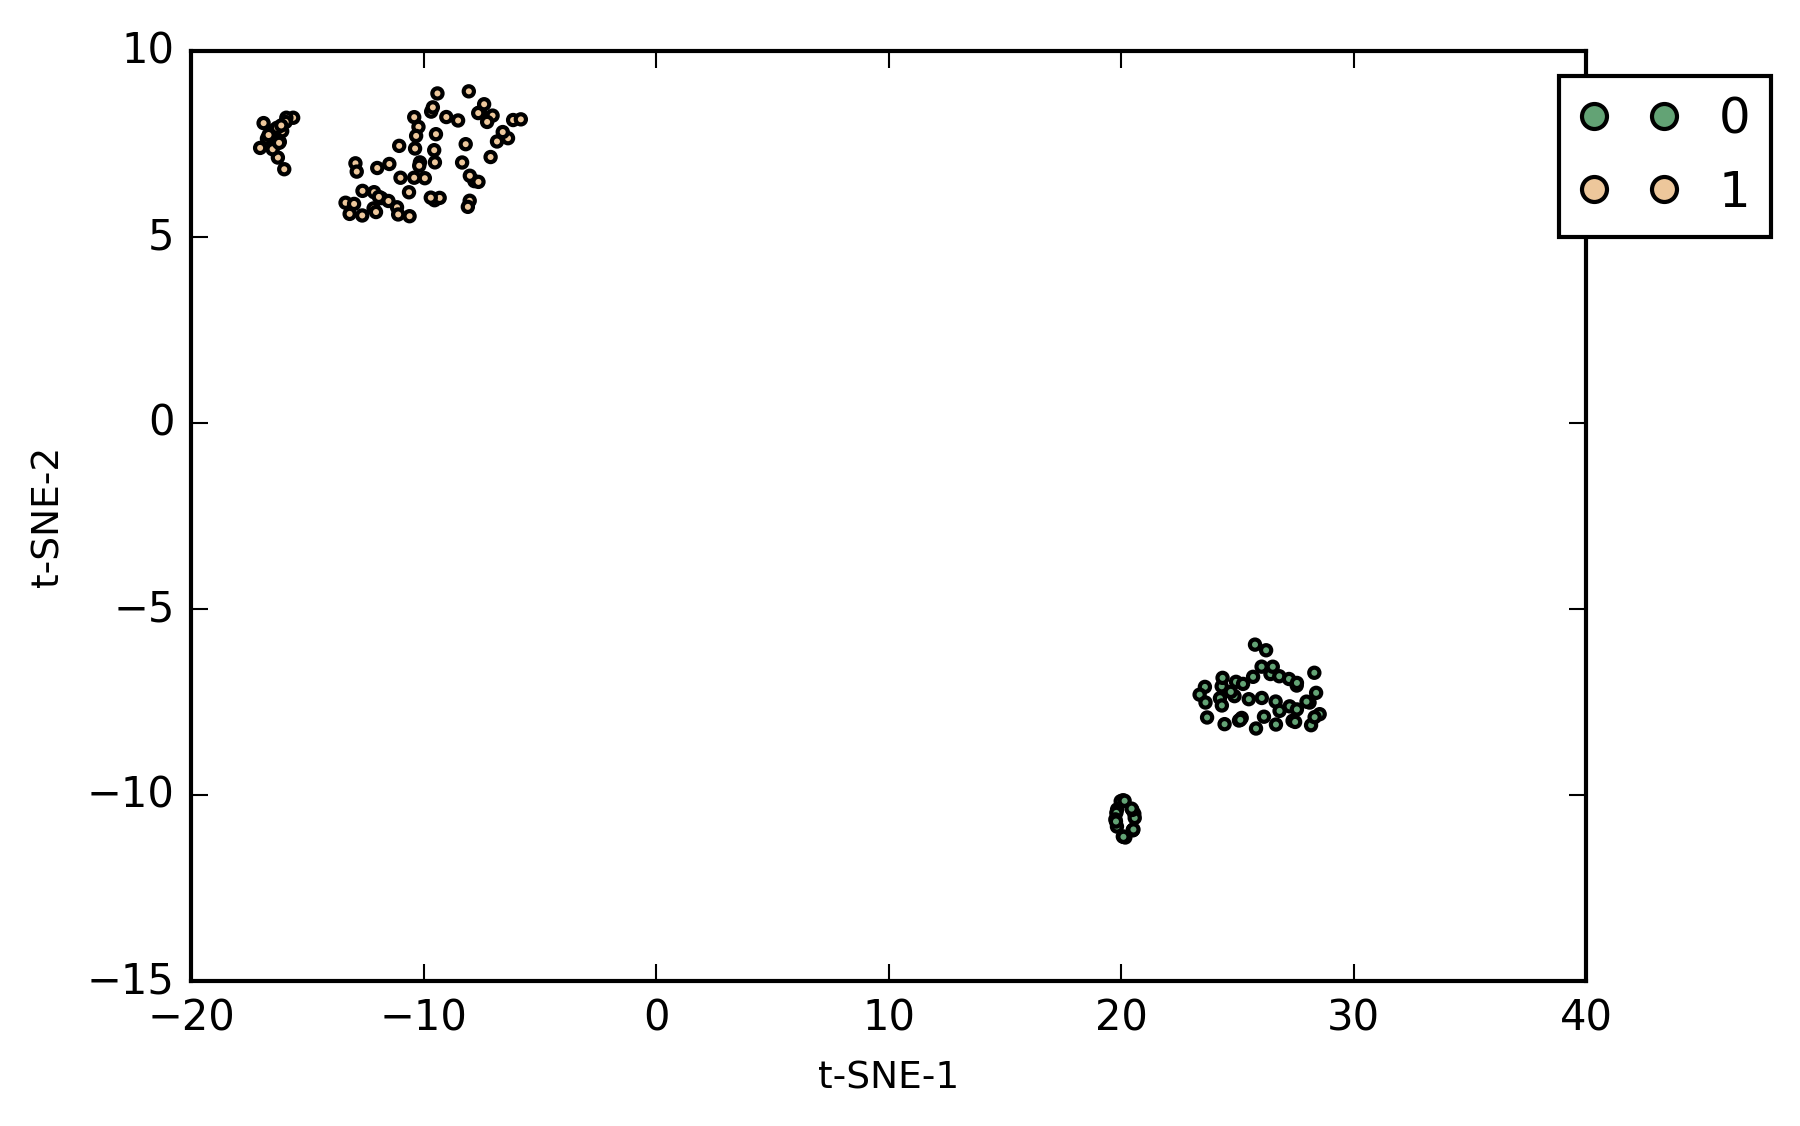

In [93]:
tsne_em


array([[-11.828931 ,   6.0322204],
       [-10.232975 ,   7.9469466],
       [-12.639734 ,   6.226556 ],
       [-13.369173 ,   5.907226 ],
       [ -8.355945 ,   6.9893074],
       [-12.162409 ,   5.755151 ],
       [-11.155052 ,   5.7853413],
       [ -7.5866346,   8.340888 ],
       [ -9.958806 ,   6.5671334],
       [-12.058954 ,   5.6574783],
       [-11.105291 ,   5.5928183],
       [-12.943561 ,   6.9672084],
       [ -6.381075 ,   7.6426764],
       [-13.001615 ,   5.8758307],
       [ -9.524849 ,   6.992878 ],
       [-11.005541 ,   6.5794406],
       [ -7.6626115,   8.317936 ],
       [ -6.1615124,   8.131004 ],
       [-10.415308 ,   8.208163 ],
       [ -6.855133 ,   7.553907 ],
       [ -7.0448713,   8.249574 ],
       [ -7.279411 ,   8.079451 ],
       [-12.651246 ,   5.565425 ],
       [-12.8878145,   6.74379  ],
       [ -5.829234 ,   8.14935  ],
       [ -7.130228 ,   7.136519 ],
       [-10.615262 ,   5.5456743],
       [ -8.528334 ,   8.119163 ],
       [ -8.067296 ,

In [95]:
df2 = DataFrame(tsne_em)
df2.head()

0         1
0 -11.828931  6.032220
1 -10.232975  7.946947
2 -12.639734  6.226556
3 -13.369173  5.907226
4  -8.355945  6.989307

In [96]:
df1_new = pd.DataFrame(tsne_em)
#df_GWFT_flen_new['label'] = Data_Result_cleaned.label_number
df1_new.columns = ["GWFT_SNE" + str(i) for i in range(len(df1_new.columns))]
df1_new.head()

GWFT_SNE0  GWFT_SNE1
0 -11.828931   6.032220
1 -10.232975   7.946947
2 -12.639734   6.226556
3 -13.369173   5.907226
4  -8.355945   6.989307

In [98]:
df1_new['label'] = ID.values
df1_new = df1_new
df1_new.head()

GWFT_SNE0  GWFT_SNE1  label
0 -11.828931   6.032220      1
1 -10.232975   7.946947      1
2 -12.639734   6.226556      1
3 -13.369173   5.907226      1
4  -8.355945   6.989307      1

In [118]:
df1_new.describe()

GWFT_SNE0   GWFT_SNE1       label
count  137.000000  137.000000  137.000000
mean     4.907979    0.139153    0.547445
std     18.026613    7.835007    0.499570
min    -17.042881  -11.155216    0.000000
25%    -11.005541   -7.606627    0.000000
50%     -7.130228    5.785341    1.000000
75%     24.705996    7.381267    1.000000
max     28.528286    8.902341    1.000000

In [99]:
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/MyDrive/SVM Model Proejct /Dataset/Data_GWFTlen_SNE.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df1_new.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


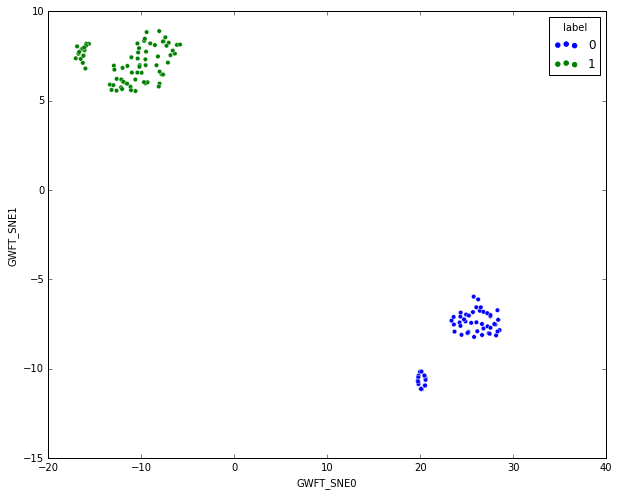

In [110]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'GWFT_SNE0', y = 'GWFT_SNE1', hue = 'label', data = df1_new )

In [100]:
X_SNE = df1_new
y = df_data_full['label_number']

In [102]:
scaler = StandardScaler()
X_SNE_train, X_SNE_test, y_train, y_test = train_test_split(X_SNE, y, test_size=0.3, random_state=42)

X_SNE_train = scaler.fit_transform(X_SNE_train)
X_SNE_test = scaler.transform(X_SNE_test)

In [103]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_SNE_train, y_train, X_SNE_test, y_test, train=True):
    if train:
        pred = clf.predict(X_SNE_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_SNE_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [104]:
from sklearn.svm import SVC
model = SVC(kernel='poly', degree=2, gamma='auto', coef0=1, C=1)
model.fit(X_SNE_train, y_train)

print_score(model, X_SNE_train, y_train, X_SNE_test, y_test, train=True)
print_score(model, X_SNE_train, y_train, X_SNE_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0       1.0        1.0           1.0
support    43.0  52.0       1.0       95.0          95.0
_______________________________________________
Confusion Matrix: 
 [[43  0]
 [ 0 52]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0       1.0        1.0           1.0
support    19.0  23.0       1.0       42.0          42.0
_______________________________________________
Confusion Matrix: 
 [[19  0]
 [ 0 23]]



In [105]:
from sklearn.svm import LinearSVC

model = LinearSVC(loss='hinge', dual=True)
model.fit(X_SNE_train, y_train)

print_score(model, X_SNE_train, y_train, X_SNE_test, y_test, train=True)
print_score(model, X_SNE_train, y_train, X_SNE_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0       1.0        1.0           1.0
support    43.0  52.0       1.0       95.0          95.0
_______________________________________________
Confusion Matrix: 
 [[43  0]
 [ 0 52]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0       1.0        1.0           1.0
support    19.0  23.0       1.0       42.0          42.0
_______________________________________________
Confusion Matrix: 
 [[19  0]
 [ 0 23]]



In [106]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_SNE_train,y_train)
print('rf accuracy : ', rf.score(X_SNE_test,y_test))

# confision matrix
y_pred = rf.predict(X_SNE_test)
y_true = y_test
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_true,y_pred)

rf accuracy :  1.0


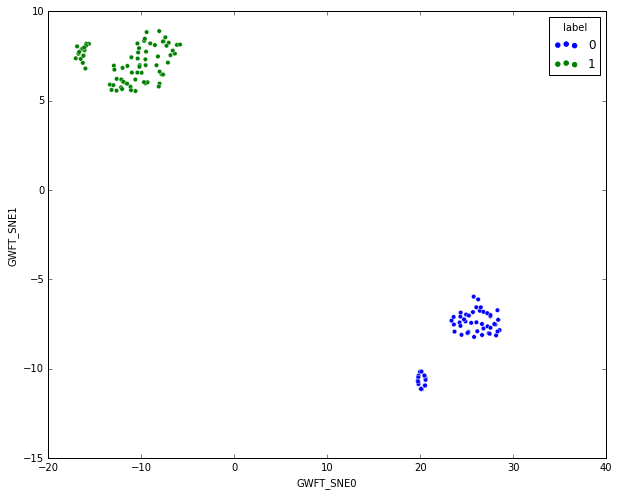

In [109]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'GWFT_SNE0', y = 'GWFT_SNE1', hue = 'label', data = df1_new )